In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [61]:
#Read in FIFA 19 Data
df = pd.read_csv("MyData.csv", encoding='latin1')
#Drop all rows that have any NaN values
df = df.dropna()
#Get a quick snapshot of FIFA 19 Data
df.head(10)

Age  Overall  Preferred.Foot  International.Reputation  Weak.Foot  \
0   27       89             0.0                       4.0        3.0   
1   26       88             1.0                       3.0        5.0   
2   26       86             1.0                       3.0        4.0   
3   28       86             1.0                       4.0        4.0   
4   29       86             0.0                       4.0        2.0   
5   24       85             0.0                       3.0        3.0   
6   31       85             1.0                       4.0        4.0   
7   30       85             1.0                       3.0        3.0   
8   31       84             1.0                       3.0        4.0   
9   24       83             0.0                       2.0        4.0   

   Skill.Moves Position  Crossing  Finishing  HeadingAccuracy      ...        \
0          4.0      CAM      82.0       90.0             84.0      ...         
1          4.0      CAM      88.0       80.0             52.0      ...         
2          4.0      CAM      72.0       87.0             77.0      ...         
3          3.0      CAM      79.0       87.0             82.0      ...         
4          4.0      CAM      83.0       73.0             54.0      ...         
5          4.0      CAM      83.0       82.0             49.0      ...         
6          3.0      CAM      76.0       75.0             82.0      ...         
7          3.0      CAM      73.0       75.0             59.0      ...         
8          4.0      CAM      87.0       78.0             59.0      ...         
9          4.0      CAM      78.0       80.0             77.0      ...         

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0       82.0        69.0           35.0         91.0    83.0       79.0   
1       89.0        46.0           56.0         83.0    91.0       67.0   
2       76.0        73.0           58.0         87.0    85.0       72.0   
3       80.0        57.0           58.0         92.0    85.0       60.0   
4       75.0        48.0           24.0         83.0    91.0       67.0   
5       82.0        73.0           28.0         81.0    81.0       81.0   
6       85.0        93.0           84.0         80.0    80.0       81.0   
7       86.0        88.0           86.0         86.0    76.0       63.0   
8       82.0        57.0           37.0         79.0    87.0       74.0   
9       88.0        67.0           58.0         86.0    81.0       71.0   

   Composure  Marking  StandingTackle  SlidingTackle  
0       87.0     59.0            47.0           48.0  
1       88.0     59.0            57.0           22.0  
2       87.0     60.0            64.0           42.0  
3       83.0     44.0            41.0           44.0  
4       82.0     24.0            16.0           19.0  
5       89.0     31.0            37.0           25.0  
6       81.0     82.0            87.0           86.0  
7       84.0     83.0            86.0           90.0  
8       82.0     32.0            36.0           39.0  
9       74.0     55.0            62.0           42.0  

[10 rows x 36 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020174E6F2E8>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

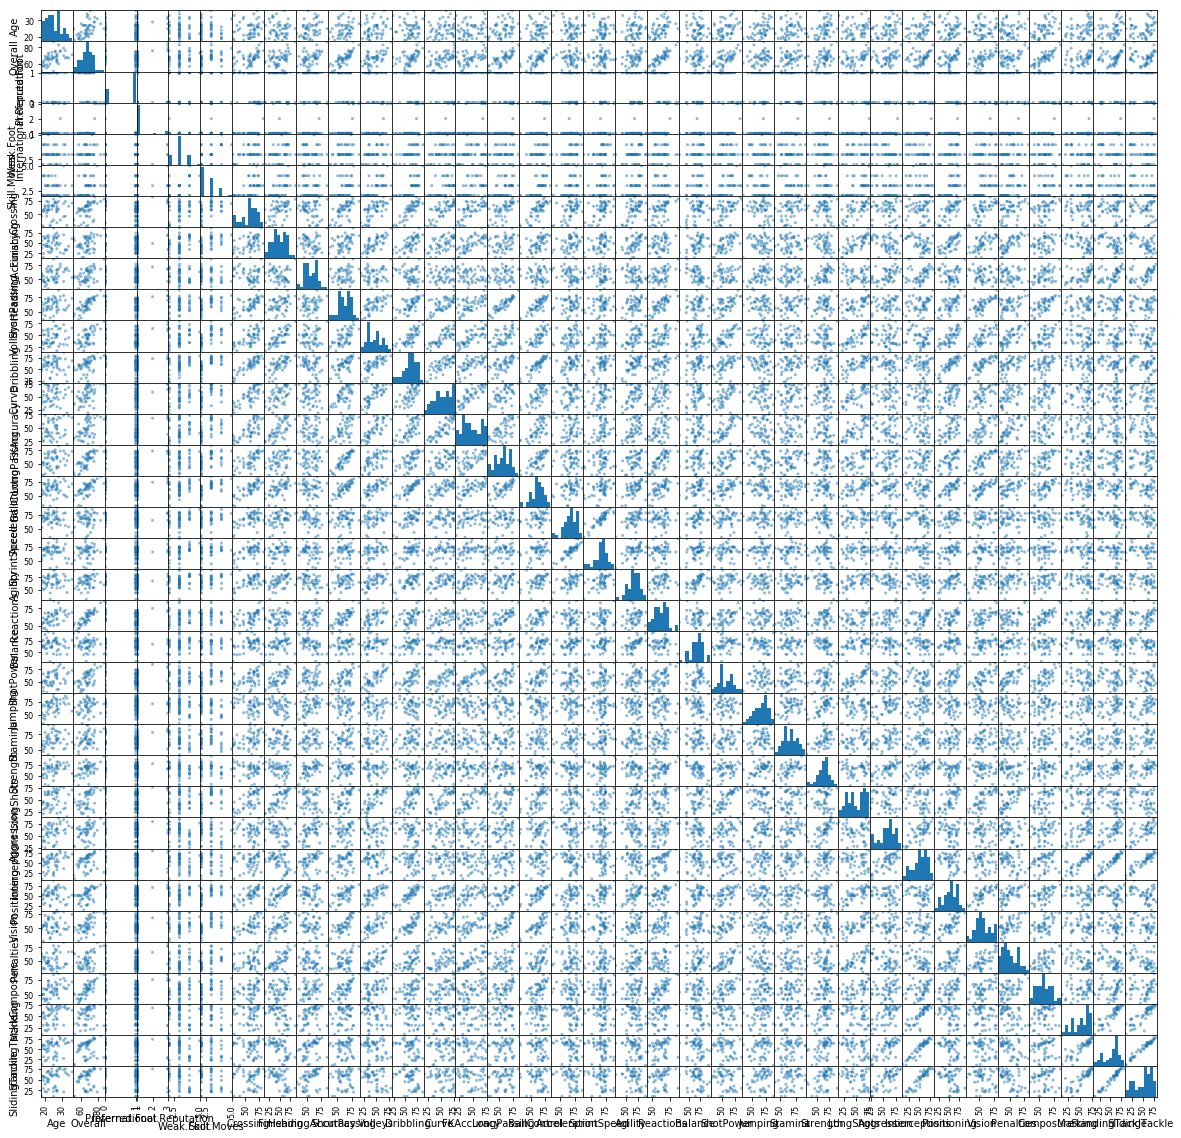

In [62]:
#Exploratory Data Analysis

#Determine how many position groups there are in the FIFA 19 data set
df['Position'].unique()

#Check the correlation between variables
df.corr()

#Take a small sample of FIFA 19 data
dfSample = df.sample(50)

#Plot the sample to get an initial view of the data's correlation, linearity and normality (or lack thereof)
pd.plotting.scatter_matrix(dfSample, figsize=(20, 20))

In [63]:
#Create list of column headers used to split data into matrix form
col = ['Age', 'Overall', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot','Skill.Moves', 'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
X=df[col]


#To be used for reshaping later
length_of_col = len(col) 

#Create list of 'Position' used to split data into matrix form
y =df['Position'] 

In [64]:
#Drop any NaN values in X or y
X = X.dropna()
y = y.dropna()

In [65]:
#The FIFA 19 data set is now stored in matrix form. The columns are the different player attributes, 
#and every row represents a separate player that plays a certain position.

In [66]:
#Even though the features of each player in FIFA 19 are measured by the same metric, 
#it is prudent to standardize the data. Since PCA yields a feature subspace that maximizes 
#the variance along the axes, it is beneficial if the data is on a unit scale
#where mean = 0, variance = 1

#Store mean and standard deviation to be used later with transform method
scaler = StandardScaler()

#Transform the player attribute data so that it is standardized
X_std = scaler.fit_transform(X)

In [67]:
#Create list of player position to be used in visualization
unique_positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']


        
                
#midfield_positions = ['CM', 'LCM', 'LM', 'RCM','RM']

#midfield_colors = {'CM':'orange', 'LCM':'lawngreen', 'LM':'cadetblue', 'RCM':'maroon', 'RM':'navajowhite'}

#Assign colors to each position group to be used in visualization
colors = {'CAM':'black', 'CB':'silver', 'CDM':'indianred', 'CF':'peru', 'CM':'orange', 
          'LAM':'gold', 'LB':'darkkhaki', 'LCB':'yellow', 'LCM':'lawngreen', 'LDM':'darkgreen',
           'LF':'turquoise', 'LM':'cadetblue', 'LS':'slategrey', 'LW':'royalblue', 'LWB':'slateblue', 
          'RAM':'chocolate', 'RB':'magenta', 'RCB':'crimson', 'RCM':'maroon', 'RDM':'mistyrose',
           'RF':'sienna', 'RM':'navajowhite', 'RS':'beige', 'RW':'darkseagreen', 'RWB':'dodgerblue', 'ST':'plum'}


In [68]:
#Calculate and print the covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006203  0.4555375  -0.00179661 ...  0.23293122  0.20539424
   0.17701755]
 [ 0.4555375   1.00006203 -0.03103678 ...  0.30571671  0.26409824
   0.22437875]
 [-0.00179661 -0.03103678  1.00006203 ... -0.05021877 -0.0631843
  -0.07665752]
 ...
 [ 0.23293122  0.30571671 -0.05021877 ...  1.00006203  0.87091547
   0.85928985]
 [ 0.20539424  0.26409824 -0.0631843  ...  0.87091547  1.00006203
   0.96659303]
 [ 0.17701755  0.22437875 -0.07665752 ...  0.85928985  0.96659303
   1.00006203]]


In [69]:
#Perform an eigendecomposition on the covariance matrix
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08523219  0.18097181 -0.17833002 ... -0.00197964  0.00525156
  -0.00154864]
 [ 0.19297237  0.21336064 -0.06653621 ... -0.18891501  0.10051212
   0.33153276]
 [-0.01481299 -0.00877292 -0.11558611 ... -0.00079084  0.0075742
  -0.00183025]
 ...
 [-0.04509521  0.32062291  0.1781021  ... -0.00234606 -0.00831668
  -0.1341153 ]
 [-0.05665656  0.3305775   0.20287314 ... -0.01821295  0.05802535
   0.11783004]
 [-0.06470176  0.32004155  0.22260603 ... -0.02984925  0.07334131
   0.07423132]]

Eigenvalues 
[12.64288915  6.81827806  3.03720755  1.80618518  1.09583535  0.93476393
  0.89242388  0.80738914  0.64418105  0.61473818  0.50442416  0.45186138
  0.43941028  0.40839179  0.38602497  0.32360105  0.03036008  0.29894493
  0.27613711  0.25528162  0.24491928  0.24008997  0.21753976  0.20979561
  0.18929555  0.08042964  0.08969038  0.08617455  0.17104606  0.16656988
  0.15189171  0.143457    0.10676141  0.11318262  0.1229988 ]


In [70]:
print(eig_vecs[:,0])

[ 0.08523219  0.19297237 -0.01481299  0.11221458  0.09894294  0.21266191
  0.20986205  0.22287403  0.00288942  0.21160139  0.22871959  0.24926431
  0.23842665  0.21415978  0.1704959   0.25250944  0.1357033   0.12309854
  0.18240439  0.18180282  0.13131164  0.22044092  0.00682111  0.10325524
 -0.03202454  0.24203943  0.01835593 -0.03404892  0.23688211  0.24126546
  0.199501    0.19516792 -0.04509521 -0.05665656 -0.06470176]


In [71]:
#In order to decide which eigenvector(s) can be dropped without losing too much information for the construction 
#of lower-dimensional subspace, identify the eigenvectors with the lowest eigenvalues. These eigenvalues 
#bear the least information about the distribution of the data, so they are dropped. In order to do so, the 
#common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
12.642889154713455
6.818278056771738
3.037207549062601
1.8061851757267242
1.0958353482697978
0.9347639311719572
0.8924238773031478
0.8073891419756215
0.6441810482080456
0.6147381837327235
0.5044241584668827
0.45186138321967995
0.43941028378563635
0.4083917941468369
0.38602496644800904
0.3236010461019962
0.2989449292143469
0.27613711254086964
0.2552816243728776
0.2449192844866876
0.2400899745364931
0.21753975749227816
0.20979560884142973
0.1892955537313577
0.17104606314506196
0.16656988155083474
0.1518917132411037
0.1434569984558615
0.1229987990950768
0.11318261744553168
0.10676140846892987
0.08969038331896484
0.08617455364978827
0.08042964280734657
0.030360075698787844


In [72]:
#After sorting the eigenpairs, the next step is to determine how many principal components will be part of the new subspace. 
#A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. 
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [73]:
tot = 0
for xx in eig_vals:
    tot += xx
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(tot,var_exp,cum_var_exp)

35.00217108119848 [36.12029986764055, 19.47958611182892, 8.67719760016271, 5.160208981142092, 3.1307639338361755, 2.670588430081894, 2.5496243511092254, 2.3066830343255846, 1.840403118748452, 1.7562858666870864, 1.441122487221473, 1.2909524445539282, 1.2553800813277747, 1.166761322317534, 1.1028600641728863, 0.9245170688163953, 0.8540753901260886, 0.7889142416345638, 0.7293308285953807, 0.6997259796214376, 0.685928807043224, 0.6215036118406103, 0.5993788452571791, 0.5408108922507334, 0.4886727247526078, 0.4758844277528494, 0.43394940527758513, 0.40985171497810263, 0.3514033424090826, 0.32335884874960813, 0.30501367535534696, 0.2562423431132313, 0.2461977385627864, 0.22978472569819985, 0.08673769300869409] [ 36.12029987  55.59988598  64.27708358  69.43729256  72.56805649
  75.23864492  77.78826928  80.09495231  81.93535543  83.6916413
  85.13276378  86.42371623  87.67909631  88.84585763  89.9487177
  90.87323476  91.72731015  92.5162244   93.24555522  93.9452812
  94.63121001  95.252713

In [74]:
#The output above clearly shows that the largest chunk of the variance (36.12% of the variance) can 
#be attributed to the first principal component. The second principal component still bears 
#nearly 20%, and the third, fourth and fifth principal components comprise nearly 75% of the variance in the data. 

In [75]:
#Construct the projection matrix used to transform the FIFA 19 data onto the new feature subspace. 
#This is a matrix of our concatenated top k eigenvectors.

#Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, 
#by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional 
#eigenvector matrix W.
matrix_w = np.hstack((eig_pairs[0][1].reshape(length_of_col,1), 
                      eig_pairs[1][1].reshape(length_of_col,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08523219  0.18097181]
 [ 0.19297237  0.21336064]
 [-0.01481299 -0.00877292]
 [ 0.11221458  0.11268793]
 [ 0.09894294 -0.02030315]
 [ 0.21266191 -0.04457779]
 [ 0.20986205  0.0478904 ]
 [ 0.22287403 -0.1364536 ]
 [ 0.00288942  0.21412289]
 [ 0.21160139  0.15685197]
 [ 0.22871959 -0.07270605]
 [ 0.24926431 -0.05509512]
 [ 0.23842665 -0.00280631]
 [ 0.21415978  0.02390365]
 [ 0.1704959   0.18777274]
 [ 0.25250944  0.04833865]
 [ 0.1357033  -0.15334632]
 [ 0.12309854 -0.13537735]
 [ 0.18240439 -0.12172556]
 [ 0.18180282  0.20183528]
 [ 0.13131164 -0.12960075]
 [ 0.22044092  0.02121502]
 [ 0.00682111  0.11715826]
 [ 0.10325524  0.15482827]
 [-0.03202454  0.2276299 ]
 [ 0.24203943 -0.0296054 ]
 [ 0.01835593  0.30337603]
 [-0.03404892  0.33768926]
 [ 0.23688211 -0.08316315]
 [ 0.24126546  0.01411834]
 [ 0.199501   -0.07343876]
 [ 0.19516792  0.17484691]
 [-0.04509521  0.32062291]
 [-0.05665656  0.3305775 ]
 [-0.06470176  0.32004155]]


In [76]:
#Finally, use the 35×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
#Y=X×W, where Y is a 16183×2 matrix of our transformed samples.
import plotly
plotly.tools.set_credentials_file(username='Agreenman23', api_key= 'anAosGBQAOnZFCzBBtUw')

In [46]:
data = []
Y = X_std.dot(matrix_w)
for name, col in zip(('CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'), colors.values()):
    trace = dict(
        type='scatter',
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='projection-matrix')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Agreenman23/0 or inside your plot.ly account where it is named 'projection-matrix'


In [66]:
#Read in FIFA 19 Data
df_attacking = pd.read_csv("Attacking_Positions.csv", encoding='latin1')
#Drop all rows that have any NaN values
df_attacking = df_attacking.dropna()
#Get a quick snapshot of FIFA 19 Data
df_attacking.head(10)

Age  Overall  Preferred.Foot  International.Reputation  Weak.Foot  \
0   27       89               0                         4          3   
1   26       88               1                         3          5   
2   26       86               1                         3          4   
3   28       86               1                         4          4   
4   29       86               0                         4          2   
5   24       85               0                         3          3   
6   31       85               1                         4          4   
7   30       85               1                         3          3   
8   31       84               1                         3          4   
9   24       83               0                         2          4   

   Skill.Moves Position  Crossing  Finishing  HeadingAccuracy      ...        \
0            4      CAM        82         90               84      ...         
1            4      CAM        88         80               52      ...         
2            4      CAM        72         87               77      ...         
3            3      CAM        79         87               82      ...         
4            4      CAM        83         73               54      ...         
5            4      CAM        83         82               49      ...         
6            3      CAM        76         75               82      ...         
7            3      CAM        73         75               59      ...         
8            4      CAM        87         78               59      ...         
9            4      CAM        78         80               77      ...         

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0         82          69             35           91      83         79   
1         89          46             56           83      91         67   
2         76          73             58           87      85         72   
3         80          57             58           92      85         60   
4         75          48             24           83      91         67   
5         82          73             28           81      81         81   
6         85          93             84           80      80         81   
7         86          88             86           86      76         63   
8         82          57             37           79      87         74   
9         88          67             58           86      81         71   

   Composure  Marking  StandingTackle  SlidingTackle  
0         87       59              47             48  
1         88       59              57             22  
2         87       60              64             42  
3         83       44              41             44  
4         82       24              16             19  
5         89       31              37             25  
6         81       82              87             86  
7         84       83              86             90  
8         82       32              36             39  
9         74       55              62             42  

[10 rows x 36 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277766A0C18>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

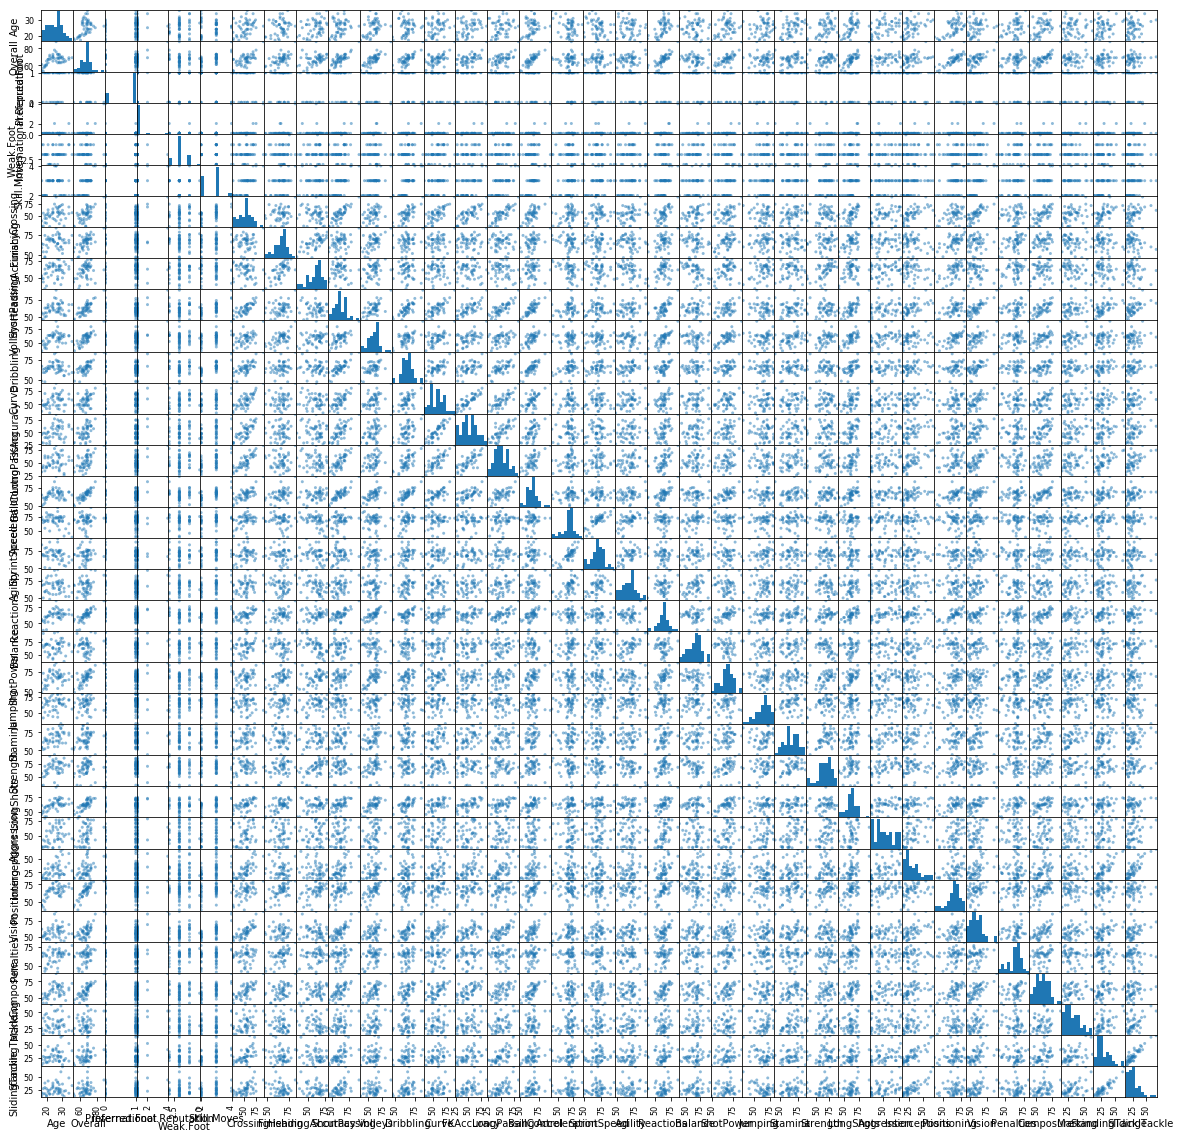

In [67]:
#Exploratory Data Analysis

#Determine how many position groups there are in the FIFA 19 data set
df_attacking['Position'].unique()

#Check the correlation between variables
df_attacking.corr()

#Take a small sample of FIFA 19 data
df_attackingSample = df_attacking.sample(50)

#Plot the sample to get an initial view of the data's correlation, linearity and normality (or lack thereof)
pd.plotting.scatter_matrix(df_attackingSample, figsize=(20, 20))

In [68]:
#Create list of column headers used to split data into matrix form
col_attacking = ['Age', 'Overall', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot','Skill.Moves', 'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
X_attacking=df_attacking[col_attacking]


#To be used for reshaping later
length_of_col_attacking = len(col_attacking) 

#Create list of 'Position' used to split data into matrix form
y_attacking=df_attacking['Position'] 

In [69]:
#Drop any NaN values in X or y
X_attacking = X_attacking.dropna()
y_attacking = y_attacking.dropna()

In [70]:
#Store mean and standard deviation to be used later with transform method
scaler_attacking = StandardScaler()

#Transform the player attribute data so that it is standardized
X_std_attacking = scaler_attacking.fit_transform(X_attacking)

In [71]:
attacking_positions = ['CAM','CF', 'LAM','LF','LS', 'LW','RAM','RF','RS', 'RW','ST']
        
attacking_colors = {'CAM':'black', 'CF':'peru', 'LAM':'gold', 'LF':'turquoise', 'LS':'slategrey', 'LW':'royalblue',
          'RAM':'chocolate', 'RF':'sienna', 'RS':'beige', 'RW':'darkseagreen', 'ST':'plum'}

In [72]:
#Calculate and print the covariance matrix
mean_vec_attacking = np.mean(X_std_attacking, axis=0)
cov_mat_attacking = (X_std_attacking - mean_vec_attacking).T.dot((X_std_attacking - mean_vec_attacking)) / (X_std_attacking.shape[0]-1)
print('Attacking Covariance matrix \n%s' %cov_mat_attacking)

Attacking Covariance matrix 
[[ 1.00022722  0.49958497  0.00818309 ...  0.16624838  0.19214656
   0.11580797]
 [ 0.49958497  1.00022722 -0.07859792 ...  0.28852344  0.28731976
   0.19184441]
 [ 0.00818309 -0.07859792  1.00022722 ... -0.03298673 -0.06448986
  -0.07884853]
 ...
 [ 0.16624838  0.28852344 -0.03298673 ...  1.00022722  0.55392816
   0.5238471 ]
 [ 0.19214656  0.28731976 -0.06448986 ...  0.55392816  1.00022722
   0.89040399]
 [ 0.11580797  0.19184441 -0.07884853 ...  0.5238471   0.89040399
   1.00022722]]


In [73]:
#Perform an eigendecomposition on the covariance matrix
cov_mat_attacking = np.cov(X_std_attacking.T)

eig_vals_attacking, eig_vecs_attacking = np.linalg.eig(cov_mat_attacking)

print('Eigenvectors \n%s' %eig_vecs_attacking)
print('\nEigenvalues \n%s' %eig_vals_attacking)

Eigenvectors 
[[-0.14929667  0.14752627  0.12014522 ... -0.1552623  -0.07050992
  -0.02631512]
 [-0.25698341  0.07873553 -0.07225849 ... -0.0238485  -0.03849831
  -0.02780483]
 [ 0.0280045   0.07489988 -0.00718361 ... -0.00294663  0.01552876
   0.00074037]
 ...
 [-0.1081517  -0.12264561  0.24041099 ...  0.03387251  0.01025364
  -0.00865624]
 [-0.12237842 -0.17314112  0.36922809 ... -0.02215123 -0.0359549
   0.09361056]
 [-0.09847477 -0.20797271  0.3639028  ...  0.00989408 -0.01951054
   0.09181462]]

Eigenvalues 
[13.52073744  5.08543167  3.04217509  1.88899889  1.07209312  0.94041133
  0.83644527  0.75080458  0.64827056  0.61159615  0.58691319  0.5392988
  0.52821844  0.46223186  0.42588623  0.02857331  0.39291485  0.34220232
  0.08372564  0.09790223  0.11815502  0.11234123  0.30026629  0.14063604
  0.28492232  0.26909203  0.25517787  0.24476702  0.17028893  0.22376479
  0.21565363  0.18694789  0.1933144   0.20740426  0.20039005]


In [74]:
print(eig_vecs_attacking[:,0])

[-0.14929667 -0.25698341  0.0280045  -0.14668626 -0.08988677 -0.19435452
 -0.20489275 -0.17576497 -0.07837233 -0.23282049 -0.20993861 -0.22701393
 -0.21437994 -0.19834124 -0.19375383 -0.24450215 -0.06593471 -0.05932904
 -0.11396458 -0.22798639 -0.05850565 -0.20512262 -0.05026076 -0.13576913
 -0.0569987  -0.21776582 -0.13246956 -0.14190477 -0.21513306 -0.21880349
 -0.14292609 -0.23121858 -0.1081517  -0.12237842 -0.09847477]


In [75]:
eig_pairs_attacking = [(np.abs(eig_vals_attacking[i]), eig_vecs_attacking[:,i]) for i in range(len(eig_vals_attacking))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_attacking.sort()
eig_pairs_attacking.reverse()

#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs_attacking:
    print(i[0])

Eigenvalues in descending order:
13.520737440496243
5.0854316691263115
3.042175088984956
1.8889988948538248
1.0720931217801164
0.9404113316759833
0.836445267225355
0.7508045766769175
0.6482705636768065
0.6115961519016903
0.5869131896060303
0.539298798309036
0.5282184397317261
0.46223186011922096
0.42588622580343966
0.39291484876856664
0.34220232015214613
0.30026629253035386
0.2849223209577483
0.2690920308237871
0.2551778689428304
0.24476702257666955
0.2237647877373345
0.21565363408819516
0.20740425766651122
0.20039004510726022
0.19331440124145546
0.18694788913193283
0.1702889349199296
0.14063603598951097
0.11815501752276411
0.11234123364195933
0.09790222848636645
0.08372564093641718
0.028573306824675345


In [76]:
tot = 0
for xx in eig_vals_attacking:
    tot += xx
var_exp_attacking = [(i / tot)*100 for i in sorted(eig_vals_attacking, reverse=True)]
cum_var_exp_attacking = np.cumsum(var_exp_attacking)

print(tot,var_exp_attacking,cum_var_exp_attacking)

35.007952738014076 [38.62190269074056, 14.526504040906667, 8.689954284820404, 5.395913634225797, 3.062427357015833, 2.6862791398104786, 2.389300721138955, 2.144668619429555, 1.8517808468498904, 1.7470206169399232, 1.6765138881392485, 1.540503674536294, 1.508852698941603, 1.3203624432950556, 1.2165413641597576, 1.122358830032104, 0.9774988063799543, 0.857708803417984, 0.8138788437301555, 0.7686597180862512, 0.7289140009199694, 0.6991754828064666, 0.639182729169864, 0.616013269047931, 0.5924489764329955, 0.5724129217349598, 0.552201388890534, 0.5340154865123883, 0.4864292870660158, 0.4017259650742117, 0.3375090751721198, 0.32090203755323116, 0.27965710882618217, 0.23916177436306363, 0.08161947383357969] [ 38.62190269  53.14840673  61.83836102  67.23427465  70.29670201
  72.98298115  75.37228187  77.51695049  79.36873133  81.11575195
  82.79226584  84.33276951  85.84162221  87.16198466  88.37852602
  89.50088485  90.47838366  91.33609246  92.1499713   92.91863102
  93.64754502  94.3467205

In [77]:
matrix_w_attacking = np.hstack((eig_pairs_attacking[0][1].reshape(length_of_col_attacking,1), 
                      eig_pairs_attacking[1][1].reshape(length_of_col_attacking,1)))

print('Matrix W:\n', matrix_w_attacking)

Matrix W:
 [[-0.14929667  0.14752627]
 [-0.25698341  0.07873553]
 [ 0.0280045   0.07489988]
 [-0.14668626  0.0630559 ]
 [-0.08988677 -0.01910418]
 [-0.19435452 -0.11589312]
 [-0.20489275 -0.18270569]
 [-0.17576497  0.24218416]
 [-0.07837233  0.3626117 ]
 [-0.23282049 -0.09332972]
 [-0.20993861  0.15114796]
 [-0.22701393 -0.10678694]
 [-0.21437994 -0.1016408 ]
 [-0.19834124 -0.10757361]
 [-0.19375383 -0.19318562]
 [-0.24450215 -0.02669292]
 [-0.06593471 -0.2241382 ]
 [-0.05932904 -0.16616536]
 [-0.11396458 -0.24979712]
 [-0.22798639  0.10238908]
 [-0.05850565 -0.2921198 ]
 [-0.20512262  0.17140039]
 [-0.05026076  0.1583133 ]
 [-0.13576913  0.03848467]
 [-0.0569987   0.32752791]
 [-0.21776582  0.09664687]
 [-0.13246956  0.13520298]
 [-0.14190477 -0.12673108]
 [-0.21513306  0.17683643]
 [-0.21880349 -0.11575754]
 [-0.14292609  0.20634961]
 [-0.23121858  0.06140417]
 [-0.1081517  -0.12264561]
 [-0.12237842 -0.17314112]
 [-0.09847477 -0.20797271]]


In [78]:
import plotly
plotly.tools.set_credentials_file(username='Agreenman23', api_key= 'anAosGBQAOnZFCzBBtUw')

In [80]:
data = []
Y_attacking = X_std_attacking.dot(matrix_w_attacking)
for name, col in zip(('CAM','CF', 'LAM','LF','LS', 'LW','RAM','RF','RS', 'RW','ST'), attacking_colors.values()):
    trace = dict(
        type='scatter',
        x=Y_attacking[y_attacking==name,0],
        y=Y_attacking[y_attacking==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='attacking_projection-matrix')

In [85]:
#Read in FIFA 19 Data
df_defending = pd.read_csv("Defensive_Positions.csv", encoding='latin1')
#Drop all rows that have any NaN values
df_defending = df_defending.dropna()
#Get a quick snapshot of FIFA 19 Data
df_defending.head(10)

Age  Overall  Preferred.Foot  International.Reputation  Weak.Foot  \
0   32       90               1                         3          3   
1   24       87               0                         3          3   
2   31       86               1                         3          3   
3   30       85               1                         3          3   
4   35       85               1                         3          4   
5   33       85               1                         3          3   
6   32       85               1                         4          3   
7   22       84               1                         2          3   
8   26       84               1                         3          4   
9   37       84               1                         3          3   

   Skill.Moves Position  Crossing  Finishing  HeadingAccuracy      ...        \
0            2       CB        55         42               92      ...         
1            2       CB        69         51               79      ...         
2            2       CB        45         47               83      ...         
3            2       CB        52         54               85      ...         
4            2       CB        45         57               94      ...         
5            2       CB        48         43               80      ...         
6            2       CB        61         45               84      ...         
7            2       CB        30         20               86      ...         
8            2       CB        49         25               80      ...         
9            2       CB        40         21               72      ...         

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0         43          89             88           48      52         50   
1         74          81             87           58      58         61   
2         24          86             86           38      47         41   
3         56          91             84           51      53         45   
4         82          72             83           53      59         60   
5         41          83             85           43      58         49   
6         55          87             82           41      59         63   
7         62          82             82           26      30         32   
8         60          78             87           32      59         41   
9         39          66             90           28      62         60   

   Composure  Marking  StandingTackle  SlidingTackle  
0         82       90              89             89  
1         82       90              89             86  
2         82       89              87             85  
3         80       83              85             84  
4         84       86              88             85  
5         81       90              90             85  
6         81       87              85             84  
7         72       82              85             83  
8         82       88              87             83  
9         88       94              90             82  

[10 rows x 36 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002779A587A20>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

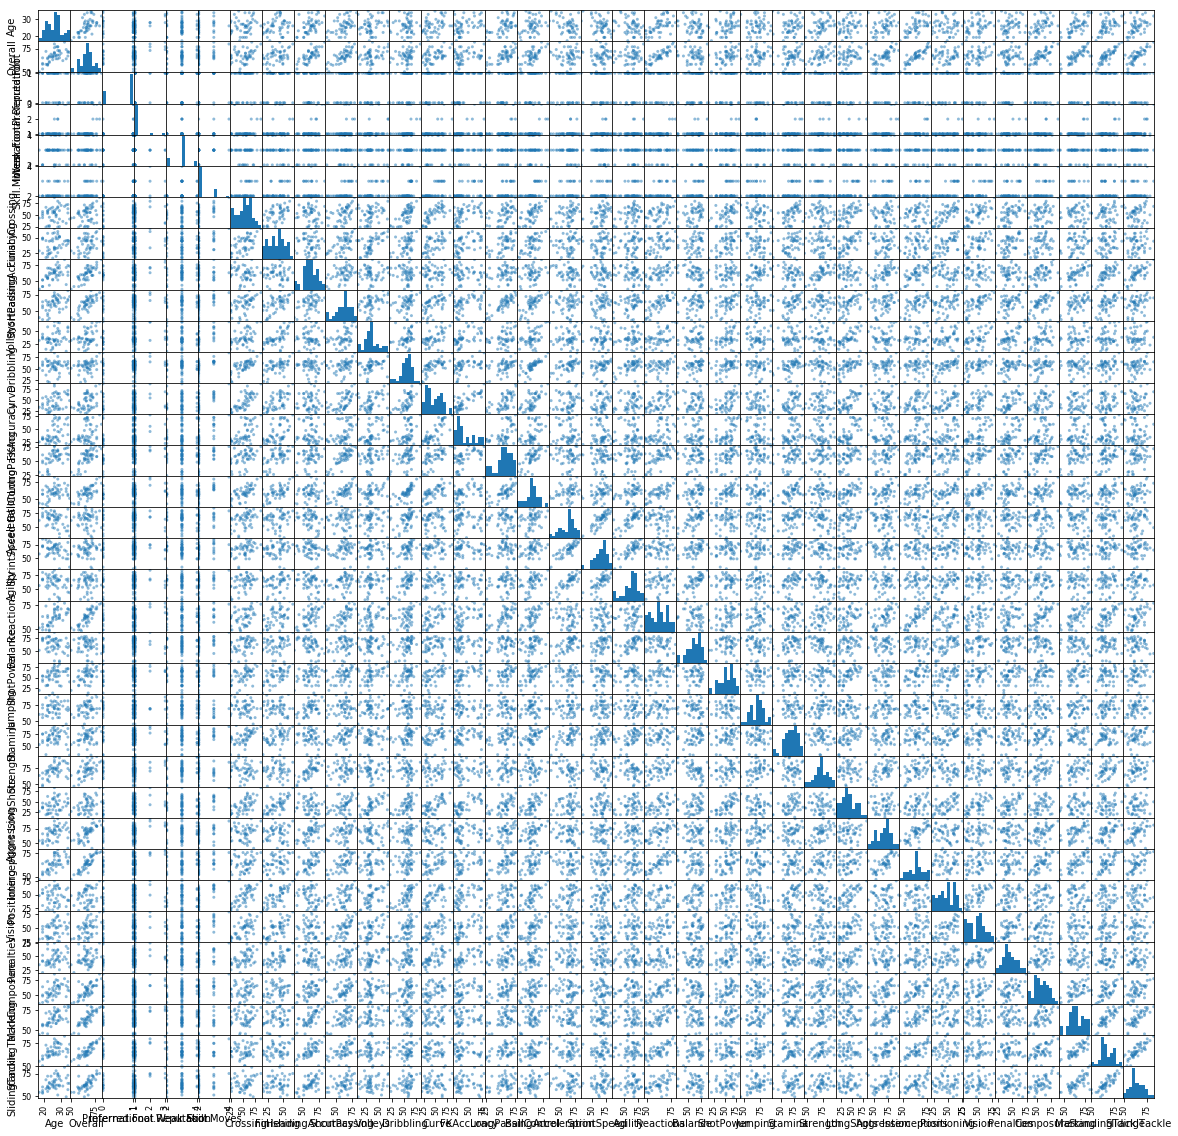

In [86]:
#Exploratory Data Analysis

#Determine how many position groups there are in the FIFA 19 data set
df_defending['Position'].unique()

#Check the correlation between variables
df_defending.corr()

#Take a small sample of FIFA 19 data
df_defendingSample = df_defending.sample(50)

#Plot the sample to get an initial view of the data's correlation, linearity and normality (or lack thereof)
pd.plotting.scatter_matrix(df_defendingSample, figsize=(20, 20))

In [89]:
#Create list of column headers used to split data into matrix form
col_defending = ['Age', 'Overall', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot','Skill.Moves', 'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
X_defending=df_defending[col_defending]


#To be used for reshaping later
length_of_col_defending = len(col_defending) 

#Create list of 'Position' used to split data into matrix form
y_defending=df_defending['Position'] 

In [90]:
#Drop any NaN values in X or y
X_defending = X_defending.dropna()
y_defending = y_defending.dropna()

In [91]:
#Store mean and standard deviation to be used later with transform method
scaler_defending = StandardScaler()

#Transform the player attribute data so that it is standardized
X_std_defending = scaler_defending.fit_transform(X_defending)

In [104]:
defending_positions = ['CB', 'CDM','LB', 'LCB','LDM','LWB','RB', 'RCB', 'RDM','RWB']

defending_colors = {'CB':'silver', 'CDM':'indianred', 'LB':'darkkhaki', 'LCB':'yellow', 'LDM':'darkgreen',
           'LWB':'slateblue', 'RB':'magenta', 'RCB':'crimson', 'RDM':'mistyrose',
            'RWB':'dodgerblue'}

In [93]:
#Calculate and print the covariance matrix
mean_vec_defending = np.mean(X_std_defending, axis=0)
cov_mat_defending = (X_std_defending - mean_vec_defending).T.dot((X_std_defending - mean_vec_defending)) / (X_std_defending.shape[0]-1)
print('defending Covariance matrix \n%s' %cov_mat_defending)

defending Covariance matrix 
[[ 1.00013691  0.43796468  0.01614007 ...  0.3825567   0.3388616
   0.31256014]
 [ 0.43796468  1.00013691  0.01050183 ...  0.80207205  0.85068586
   0.79970912]
 [ 0.01614007  0.01050183  1.00013691 ...  0.04231447  0.02174735
  -0.02099216]
 ...
 [ 0.3825567   0.80207205  0.04231447 ...  1.00013691  0.77564391
   0.72482645]
 [ 0.3388616   0.85068586  0.02174735 ...  0.77564391  1.00013691
   0.88609914]
 [ 0.31256014  0.79970912 -0.02099216 ...  0.72482645  0.88609914
   1.00013691]]


In [94]:
#Perform an eigendecomposition on the covariance matrix
cov_mat_defending = np.cov(X_std_defending.T)

eig_vals_defending, eig_vecs_defending = np.linalg.eig(cov_mat_defending)

print('Eigenvectors \n%s' %eig_vecs_defending)
print('\nEigenvalues \n%s' %eig_vals_defending)

Eigenvectors 
[[-1.14702181e-01  1.52743660e-01  1.75156350e-01 ... -7.00233886e-03
  -2.32293407e-02  1.71460168e-04]
 [-2.17769124e-01  2.05763881e-01 -1.36559715e-01 ... -8.10088493e-02
   4.17426354e-02 -1.52246880e-02]
 [ 2.13387678e-02  7.46393214e-02  3.75247720e-02 ... -5.08167303e-03
   1.28356506e-02  2.67614726e-02]
 ...
 [-1.51731111e-01  2.43788739e-01 -1.46812178e-01 ...  2.06089639e-01
  -2.15790989e-02  4.02518395e-02]
 [-1.58337168e-01  2.55094579e-01 -1.93740100e-01 ...  8.08640563e-03
  -3.67516562e-02  4.40247006e-02]
 [-1.55460439e-01  2.18285557e-01 -2.46990857e-01 ...  6.81044366e-02
  -7.17053840e-02  8.00627428e-02]]

Eigenvalues 
[13.52439386  6.01949422  2.48350666  1.17862354  1.07654413  0.97820205
  0.84236056  0.82837279  0.67293759  0.65994639  0.56808189  0.50153295
  0.49397545  0.45153129  0.42592618  0.42087476  0.04950693  0.09376698
  0.10190127  0.33531004  0.12002921  0.31234725  0.14244227  0.15878802
  0.29585155  0.1795447   0.18193812  0.1877

In [74]:
print(eig_vecs_defending[:,0])

[-0.14929667 -0.25698341  0.0280045  -0.14668626 -0.08988677 -0.19435452
 -0.20489275 -0.17576497 -0.07837233 -0.23282049 -0.20993861 -0.22701393
 -0.21437994 -0.19834124 -0.19375383 -0.24450215 -0.06593471 -0.05932904
 -0.11396458 -0.22798639 -0.05850565 -0.20512262 -0.05026076 -0.13576913
 -0.0569987  -0.21776582 -0.13246956 -0.14190477 -0.21513306 -0.21880349
 -0.14292609 -0.23121858 -0.1081517  -0.12237842 -0.09847477]


In [98]:
eig_pairs_defending = [(np.abs(eig_vals_defending[i]), eig_vecs_defending[:,i]) for i in range(len(eig_vals_defending))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_defending.sort()
eig_pairs_defending.reverse()

#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs_defending:
    print(i[0])

Eigenvalues in descending order:
13.52439385837796
6.01949421776144
2.4835066634003833
1.1786235379864665
1.0765441345694953
0.9782020470560924
0.8423605564941936
0.8283727939562305
0.6729375894335077
0.6599463921764583
0.5680818922299735
0.5015329479781283
0.49397544935790516
0.45153129346312987
0.4259261849673209
0.42087475503022975
0.33531004101470324
0.31234725261514595
0.2958515485155777
0.27561619936396115
0.2663428402410461
0.2639836424644238
0.2549295364694474
0.231396455876656
0.22335571278279662
0.20369155268243894
0.18774530452663418
0.18193811956019762
0.17954469659797098
0.15878802350868598
0.1424422672097256
0.1200292081563491
0.10190126770566744
0.09376697722639335
0.04950693409542183


In [99]:
tot = 0
for xx in eig_vals_defending:
    tot += xx
var_exp_defending = [(i / tot)*100 for i in sorted(eig_vals_defending, reverse=True)]
cum_var_exp_defending = np.cumsum(var_exp_defending)

print(tot,var_exp_defending,cum_var_exp_defending)

35.00479189485216 [38.63583562788405, 17.196200554035208, 7.094761971047771, 3.367034837764015, 3.0754193248833825, 2.794480395696761, 2.406414981767316, 2.3664554168598038, 1.922415626565889, 1.8853030012542675, 1.622868931591952, 1.4327551195980235, 1.4111652222978925, 1.2899128062793384, 1.2167653681436625, 1.2023346869036065, 0.9578975416334764, 0.8922985560187833, 0.8451744247023675, 0.7873670558929777, 0.760875371123731, 0.7541357287807373, 0.7282703957652654, 0.6610422269377507, 0.6380718201488395, 0.5818961966529903, 0.5363417245575575, 0.5197520388257288, 0.5129146236243587, 0.4536179617512239, 0.40692219407444413, 0.34289364872356437, 0.2911066233781928, 0.26786897493363704, 0.14142901990142204] [ 38.63583563  55.83203618  62.92679815  66.29383299  69.36925232
  72.16373271  74.57014769  76.93660311  78.85901874  80.74432174
  82.36719067  83.79994579  85.21111101  86.50102382  87.71778919
  88.92012387  89.87802141  90.77031997  91.61549439  92.40286145
  93.16373682  93.917

In [100]:
matrix_w_defending = np.hstack((eig_pairs_defending[0][1].reshape(length_of_col_defending,1), 
                      eig_pairs_defending[1][1].reshape(length_of_col_defending,1)))

print('Matrix W:\n', matrix_w_defending)

Matrix W:
 [[-0.11470218  0.15274366]
 [-0.21776912  0.20576388]
 [ 0.02133877  0.07463932]
 [-0.11741562  0.12097219]
 [-0.0628233  -0.02049804]
 [-0.16929707 -0.11732866]
 [-0.19721785 -0.16700995]
 [-0.20161312 -0.10862083]
 [-0.06821853  0.32165127]
 [-0.22888594  0.02818698]
 [-0.1942392  -0.07967389]
 [-0.21300428 -0.16059705]
 [-0.21139071 -0.12569078]
 [-0.19055894 -0.08463903]
 [-0.22014615  0.03538226]
 [-0.23863754 -0.03993853]
 [-0.09009998 -0.25651758]
 [-0.08816773 -0.21769858]
 [-0.139747   -0.24517325]
 [-0.21451575  0.13605301]
 [-0.0928109  -0.26239713]
 [-0.20381326  0.02326976]
 [-0.04386443  0.05608761]
 [-0.14764076 -0.06719062]
 [-0.01924564  0.30163413]
 [-0.21600913 -0.07710135]
 [-0.14097043  0.20714136]
 [-0.17810706  0.23154328]
 [-0.19754306 -0.17936522]
 [-0.21756032 -0.09031668]
 [-0.17363098 -0.03303297]
 [-0.20921561  0.14884568]
 [-0.15173111  0.24378874]
 [-0.15833717  0.25509458]
 [-0.15546044  0.21828556]]


In [101]:
import plotly
plotly.tools.set_credentials_file(username='Agreenman23', api_key= 'anAosGBQAOnZFCzBBtUw')

In [105]:
data = []
Y_defending = X_std_defending.dot(matrix_w_defending)
for name, col in zip(('CB', 'CDM','LB', 'LCB','LDM','LWB','RB', 'RCB', 'RDM','RWB'), defending_colors.values()):
    trace = dict(
        type='scatter',
        x=Y_defending[y_defending==name,0],
        y=Y_defending[y_defending==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='defending_projection-matrix')

In [107]:
#Read in FIFA 19 Data
df_midfield = pd.read_csv("Midfield_Positions.csv", encoding='latin1')
#Drop all rows that have any NaN values
df_midfield = df_midfield.dropna()
#Get a quick snapshot of FIFA 19 Data
df_midfield.head(10)

Age  Overall  Preferred.Foot  International.Reputation  Weak.Foot  \
0   27       86               1                         3          3   
1   23       85               1                         2          4   
2   26       84               1                         2          3   
3   27       84               1                         3          4   
4   23       83               1                         2          4   
5   23       83               1                         2          3   
6   23       83               0                         2          3   
7   23       83               1                         3          4   
8   24       83               1                         3          5   
9   31       83               1                         4          3   

   Skill.Moves Position  Crossing  Finishing  HeadingAccuracy      ...        \
0            5       CM        72         69               54      ...         
1            4       CM        64         80               86      ...         
2            3       CM        75         57               56      ...         
3            4       CM        74         73               50      ...         
4            4       CM        62         74               42      ...         
5            3       CM        67         75               82      ...         
6            3       CM        70         69               77      ...         
7            3       CM        75         72               75      ...         
8            4       CM        83         78               65      ...         
9            3       CM        85         72               74      ...         

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0         79          57             78           79      86         75   
1         80          73             78           79      85         56   
2         62          79             78           72      87         84   
3         73          70             77           79      86         76   
4         73          78             75           74      81         58   
5         81          81             76           79      80         70   
6         79          76             80           76      80         69   
7         78          80             83           77      82         60   
8         82          48             66           79      84         63   
9         70          45             50           72      91         78   

   Composure  Marking  StandingTackle  SlidingTackle  
0         85       67              63             65  
1         82       75              77             72  
2         79       63              78             70  
3         87       73              68             64  
4         79       68              62             61  
5         74       75              78             71  
6         82       70              81             75  
7         80       70              79             78  
8         83       39              64             44  
9         92       64              59             58  

[10 rows x 36 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277B63E7710>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

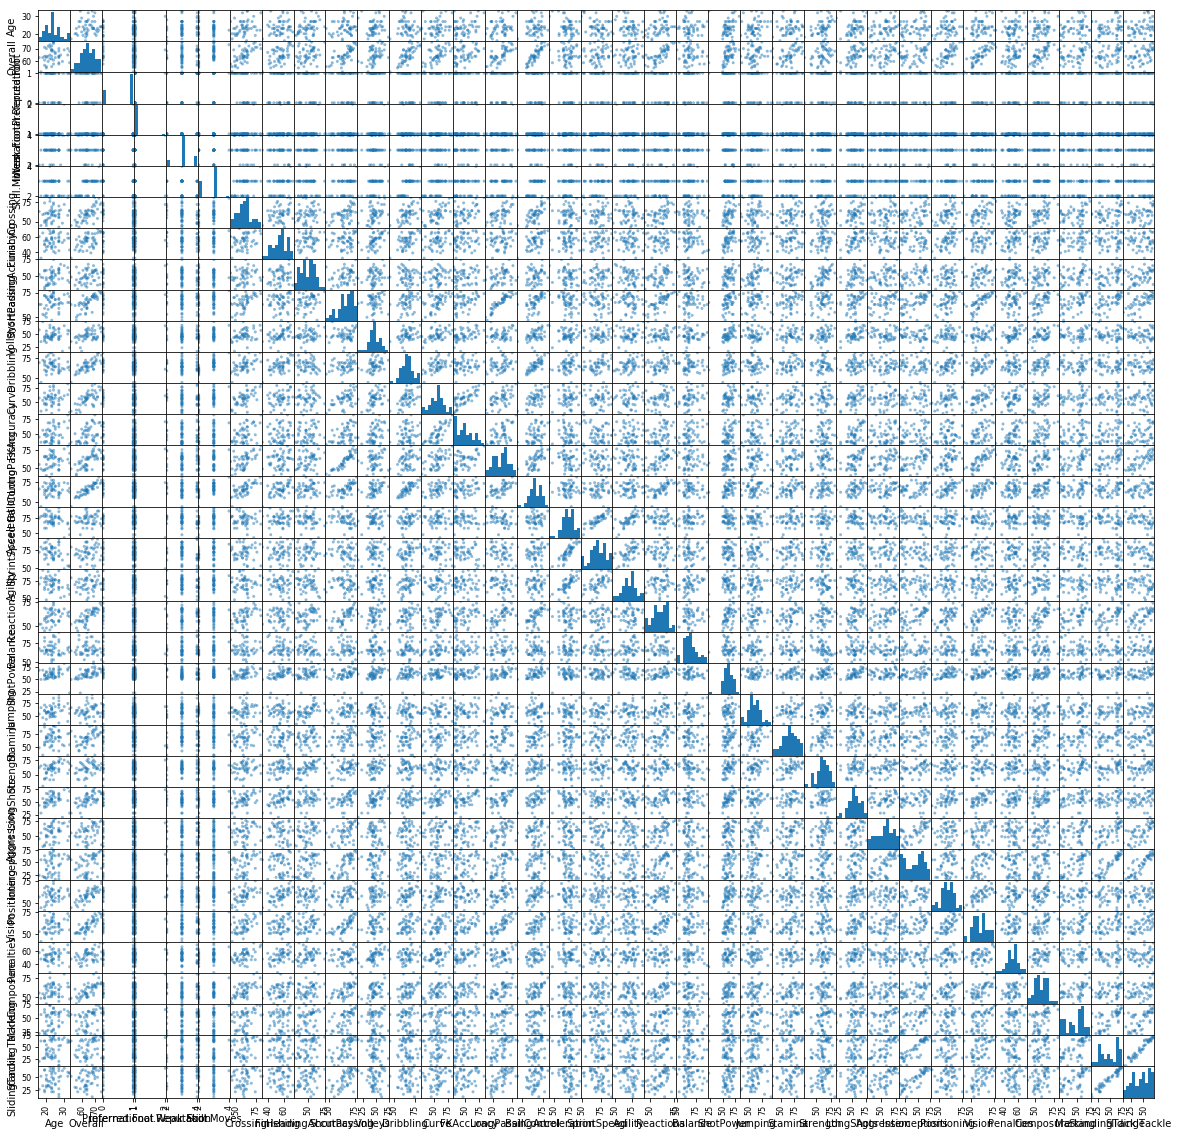

In [108]:
#Exploratory Data Analysis

#Determine how many position groups there are in the FIFA 19 data set
df_midfield['Position'].unique()

#Check the correlation between variables
df_midfield.corr()

#Take a small sample of FIFA 19 data
df_midfieldSample = df_midfield.sample(50)

#Plot the sample to get an initial view of the data's correlation, linearity and normality (or lack thereof)
pd.plotting.scatter_matrix(df_midfieldSample, figsize=(20, 20))

In [109]:
#Create list of column headers used to split data into matrix form
col_midfield = ['Age', 'Overall', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot','Skill.Moves', 'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
X_midfield=df_midfield[col_midfield]


#To be used for reshaping later
length_of_col_midfield = len(col_midfield) 

#Create list of 'Position' used to split data into matrix form
y_midfield=df_midfield['Position'] 

In [110]:
#Drop any NaN values in X or y
X_midfield = X_midfield.dropna()
y_midfield = y_midfield.dropna()

In [111]:
#Store mean and standard deviation to be used later with transform method
scaler_midfield = StandardScaler()

#Transform the player attribute data so that it is standardized
X_std_midfield = scaler_midfield.fit_transform(X_midfield)

In [112]:
midfield_positions = ['CM', 'LCM', 'LM', 'RCM','RM']
midfield_colors = {'CM':'orange', 'LCM':'lawngreen', 'LM':'cadetblue', 'RCM':'maroon', 'RM':'navajowhite'}

In [113]:
#Calculate and print the covariance matrix
mean_vec_midfield = np.mean(X_std_midfield, axis=0)
cov_mat_midfield = (X_std_midfield - mean_vec_midfield).T.dot((X_std_midfield - mean_vec_midfield)) / (X_std_midfield.shape[0]-1)
print('midfield Covariance matrix \n%s' %cov_mat_midfield)

midfield Covariance matrix 
[[ 1.00022738  0.44075691 -0.01276277 ...  0.23240415  0.19139434
   0.14093685]
 [ 0.44075691  1.00022738 -0.05102981 ...  0.31865134  0.2704922
   0.2037518 ]
 [-0.01276277 -0.05102981  1.00022738 ...  0.04165421  0.04505624
   0.03295355]
 ...
 [ 0.23240415  0.31865134  0.04165421 ...  1.00022738  0.76979885
   0.73769871]
 [ 0.19139434  0.2704922   0.04505624 ...  0.76979885  1.00022738
   0.93927783]
 [ 0.14093685  0.2037518   0.03295355 ...  0.73769871  0.93927783
   1.00022738]]


In [114]:
#Perform an eigendecomposition on the covariance matrix
cov_mat_midfield = np.cov(X_std_midfield.T)

eig_vals_midfield, eig_vecs_midfield = np.linalg.eig(cov_mat_midfield)

print('Eigenvectors \n%s' %eig_vecs_midfield)
print('\nEigenvalues \n%s' %eig_vals_midfield)

Eigenvectors 
[[-1.42636199e-01 -5.40736902e-02  1.00679293e-01 ... -9.44886334e-02
   3.49211759e-02  2.77258815e-04]
 [-2.60374939e-01  2.87194384e-02 -6.77895205e-02 ... -1.38797043e-02
  -3.96276792e-02  2.19573520e-02]
 [ 1.55431134e-02 -4.72645882e-02 -6.19801591e-02 ...  3.91071991e-02
  -1.24764031e-02 -4.86498251e-03]
 ...
 [-1.02480639e-01 -2.94590236e-01 -1.31734950e-01 ...  5.20016610e-01
  -3.91862836e-01 -1.13309911e-01]
 [-9.21119405e-02 -3.40616212e-01 -1.36171973e-01 ... -1.88915765e-01
   1.75164648e-01  2.29633869e-02]
 [-7.36756242e-02 -3.39144628e-01 -1.49491144e-01 ... -2.19078275e-01
   2.35939418e-01  7.66899337e-03]]

Eigenvalues 
[13.41708616  5.94487779  2.09803033  1.73501366  1.13002828  1.10803971
  0.85344151  0.77602354  0.68805023  0.69661406  0.54082076  0.49714438
  0.03757923  0.46774967  0.0528133   0.4370431   0.07739233  0.09924052
  0.39981518  0.11990139  0.13521661  0.37441677  0.1608062   0.17922024
  0.18337051  0.19923054  0.22124433  0.3532

In [115]:
print(eig_vecs_midfield[:,0])

[-0.1426362  -0.26037494  0.01554311 -0.14303568 -0.07850266 -0.18096139
 -0.20889591 -0.1877402  -0.12319176 -0.22585379 -0.19912942 -0.21980824
 -0.21053886 -0.19203182 -0.19672403 -0.24448296 -0.04849683 -0.03887527
 -0.09993342 -0.22977941 -0.042654   -0.21525268 -0.06934777 -0.13971599
 -0.10125792 -0.22927607 -0.12317601 -0.11595681 -0.21650023 -0.23363432
 -0.17144593 -0.23173205 -0.10248064 -0.09211194 -0.07367562]


In [116]:
eig_pairs_midfield = [(np.abs(eig_vals_midfield[i]), eig_vecs_midfield[:,i]) for i in range(len(eig_vals_midfield))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_midfield.sort()
eig_pairs_midfield.reverse()

#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs_midfield:
    print(i[0])

Eigenvalues in descending order:
13.417086158463134
5.944877786197718
2.098030328057782
1.7350136646468903
1.1300282826107895
1.1080397084695273
0.8534415069138908
0.7760235356484924
0.6966140568242547
0.6880502338625795
0.5408207632370784
0.49714438193815497
0.4677496696958764
0.4370431025653602
0.39981517984054177
0.37441677046022576
0.3532814784287356
0.3320537671832573
0.30680587028700784
0.2991125508893246
0.2915955838395175
0.28374768077988094
0.2644086192963295
0.24674229784745222
0.22124432539686553
0.19923053903678015
0.1833705107993195
0.1792202368310923
0.16080620052759118
0.13521660600835633
0.11990138755653634
0.09924052252983441
0.0773923304485991
0.05281329506772916
0.03757923061479875


In [117]:
tot = 0
for xx in eig_vals_midfield:
    tot += xx
var_exp_midfield = [(i / tot)*100 for i in sorted(eig_vals_midfield, reverse=True)]
cum_var_exp_midfield = np.cumsum(var_exp_midfield)

print(tot,var_exp_midfield,cum_var_exp_midfield)

35.00795816280131 [38.32581750717423, 16.981503915628572, 5.993009698826431, 4.956055010630348, 3.227918284624588, 3.165108068618826, 2.437849996692292, 2.216706075914699, 1.9898734270211211, 1.9654109236044695, 1.5448509185312689, 1.4200896254109723, 1.3361238251047072, 1.2484107200223769, 1.1420694059940253, 1.0695190182730303, 1.0091461969470839, 0.9485093807501472, 0.876388930940317, 0.8544130151730901, 0.8329408487163945, 0.8105233657454065, 0.7552814650506646, 0.7048177351561029, 0.6319829461860901, 0.5691007116446973, 0.5237966463127376, 0.5119414162849629, 0.4593418438738319, 0.3862453370731988, 0.34249751727577454, 0.283479893538279, 0.22107067795469004, 0.15086082662155204, 0.10734482268300247] [ 38.32581751  55.30732142  61.30033112  66.25638613  69.48430442
  72.64941249  75.08726248  77.30396856  79.29384199  81.25925291
  82.80410383  84.22419345  85.56031728  86.808728    87.9507974
  89.02031642  90.02946262  90.977972    91.85436093  92.70877395
  93.54171479  94.35223

In [118]:
matrix_w_midfield = np.hstack((eig_pairs_midfield[0][1].reshape(length_of_col_midfield,1), 
                      eig_pairs_midfield[1][1].reshape(length_of_col_midfield,1)))

print('Matrix W:\n', matrix_w_midfield)

Matrix W:
 [[-0.1426362  -0.05407369]
 [-0.26037494  0.02871944]
 [ 0.01554311 -0.04726459]
 [-0.14303568  0.00751837]
 [-0.07850266  0.04170487]
 [-0.18096139  0.15281245]
 [-0.20889591  0.10578163]
 [-0.1877402   0.18402651]
 [-0.12319176 -0.15688067]
 [-0.22585379 -0.10849652]
 [-0.19912942  0.1172822 ]
 [-0.21980824  0.16222357]
 [-0.21053886  0.08932984]
 [-0.19203182  0.02677744]
 [-0.19672403 -0.17095493]
 [-0.24448296  0.04813091]
 [-0.04849683  0.2859936 ]
 [-0.03887527  0.26712939]
 [-0.09993342  0.24092876]
 [-0.22977941 -0.05151616]
 [-0.042654    0.18473542]
 [-0.21525268  0.0233002 ]
 [-0.06934777 -0.05629992]
 [-0.13971599 -0.09688608]
 [-0.10125792 -0.19260761]
 [-0.22927607  0.03242792]
 [-0.12317601 -0.25452752]
 [-0.11595681 -0.32021903]
 [-0.21650023  0.10142771]
 [-0.23363432 -0.02662784]
 [-0.17144593  0.10606684]
 [-0.23173205 -0.02237221]
 [-0.10248064 -0.29459024]
 [-0.09211194 -0.34061621]
 [-0.07367562 -0.33914463]]


In [119]:
import plotly
plotly.tools.set_credentials_file(username='Agreenman23', api_key= 'anAosGBQAOnZFCzBBtUw')

In [120]:
data = []
Y_midfield = X_std_midfield.dot(matrix_w_midfield)
for name, col in zip(('CM', 'LCM', 'LM', 'RCM','RM'), midfield_colors.values()):
    trace = dict(
        type='scatter',
        x=Y_midfield[y_midfield==name,0],
        y=Y_midfield[y_midfield==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='midfield_projection-matrix')